# Colibri photoZ study on a mock sample of GRBs

Aim: create a mock sample of GRBs and study the detection efficiency and reliability of photometric redshift estimation for 2 observational strategies.

In [1]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
import hjson
import os, shutil
import subprocess as sp
import imp
from astropy.table import vstack, Table

# Find location of pyGRBz module
_, path_pyGRBz, _ = imp.find_module('pyGRBz')

In [2]:
# Some parameters
configFile = 'Colibri_photoZ_mock.hjson'
name_telescope = 'colibri'
resdir = 'Mock_emp'
mock_type = 'empirical'
add_dusty_GRBs = True
nb_GRBs = 10
nb_dusty_GRBs = 5
display_plot=False

# Update transmission curves

In [3]:
# Create latest transmission curves to the transmission folder of pyGRBz
from pyETC.pyETC import etc

# Filters to use
filters = ['g','r','i','z','y','gri','zy','J','H']

etc_colibri=etc(configFile=configFile,name_telescope=name_telescope)

# Change wavelength sampling with step of 10nm
etc_colibri.information["lambda_start"]= 0.29
etc_colibri.information["lambda_end"]= 2.5
etc_colibri.information["lambda_step"]= 0.01

for band in filters:
    etc_colibri.information["filter_band"] = band
    if band in ['gri','g','r','i']:
        etc_colibri.information['channel']='DDRAGO-B'
    elif band in ['zy','z','y']:
        etc_colibri.information['channel']='DDRAGO-R'
    elif band in ['J','H']:
        etc_colibri.information['channel']='CAGIRE'    
    etc_colibri.sim()
    x = etc_colibri.information['wavelength_ang'] / 10
    y = etc_colibri.information['system_response']
    np.savetxt(path_pyGRBz+'/transmissions/colibri/'+'%s.txt' % band,np.array([x,y]).T,fmt='%.2f %.4f')


# Define observational strategy

In [5]:
# Load package
from colibri_obs_strategy.build_lc import obs_strategy

obs_strat=obs_strategy(resdir=resdir,plot=display_plot)

In [6]:
#Choose filters for each channel.
# For each channel, the first list corresponds to the filters to use prior to detection.
# The second list to filters to use after detection
obs_strat.set_filters(vis1=[['gri'],['g','r','i']],
                      vis2=[['zy'],['z','y']],
                      nir=[['J'],['J','H']])

#If only 2 channels, just write None, for example nir=None or vis2=None
#obs_strat.set_filters(vis1=None,
#                      vis2=[['zy'],['z','y']],
#                      nir=[['J'],['J']])

In [7]:
# Load strategy from file
#obs_strat.set_strategy_obs(load_strategy=True,filename='Default_strategy.hjson')

# Create the astropy table with the time schedule of observations and corresponding bands
# magnitude and associated errors are set to -99
obs_strat.set_strategy_obs(load_strategy=False,
                           t_since_burst=60,
                           t_start=0,
                           t_end=300,
                           t_dead=5,
                           texp=[30,30],
                           filter_set=0)

Name,Nb_obs,time_since_burst,Exp_time,band,telescope,mag,mag_err,detection,phot_sys
,,s,s,,,,,,
object,int64,int64,int64,str3,str7,float64,float64,int64,str2
None,1,60,30,gri,colibri,-99.000,-99.000,0,AB
None,1,60,30,zy,colibri,-99.000,-99.000,0,AB
None,1,60,30,J,colibri,-99.000,-99.000,0,AB
None,2,95,30,gri,colibri,-99.000,-99.000,0,AB
None,2,95,30,zy,colibri,-99.000,-99.000,0,AB
None,2,95,30,J,colibri,-99.000,-99.000,0,AB
None,3,130,30,gri,colibri,-99.000,-99.000,0,AB
None,3,130,30,zy,colibri,-99.000,-99.000,0,AB


## Mock samples generation

/home/corre/codes/mygithub/colibri_obs_strategy/colibri_obs_strategy/build_lc.py:458: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist = np.histogram(distrib['Rc'], bins=13,normed=True,range=(np.min(distrib['Rc']),np.max(distrib['Rc'])))
/home/corre/codes/mygithub/colibri_obs_strategy/colibri_obs_strategy/build_lc.py:825: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = plt.hist(distrib,bins=int(num_bins),normed=0, facecolor='c')#,alpha=0.5)


 name   z   Av_host ExtLaw    F0     wvl0   t0  alpha beta  Rc 
------ ---- ------- ------ -------- ------ ---- ----- ---- ----
 GRB_0 0.27    0.24    smc    0.437 6400.0 86.4  1.19 0.63 12.3
 GRB_1 7.39    0.23    smc  0.00181 6400.0 86.4  0.56 0.88 11.4
 GRB_2 5.89     0.2    smc   0.0203 6400.0 86.4  1.28 0.76 10.3
 GRB_3 9.44    0.27    smc  0.00444 6400.0 86.4  1.31 0.15 12.7
 GRB_4 9.58    0.31    lmc 0.000469 6400.0 86.4  0.92 1.18 12.5
 GRB_5 2.93    0.28    smc  0.00105 6400.0 86.4  1.07  1.1 14.0
 GRB_6 7.27    0.43    smc   0.0148 6400.0 86.4  0.88 0.75 9.85
 GRB_7 4.52    0.36     mw   0.0963 6400.0 86.4  1.16 0.46 9.15
 GRB_8 3.41    0.04     mw    0.202 6400.0 86.4  0.32 1.14 7.36
 GRB_9  5.4    0.08    lmc    0.002 6400.0 86.4  1.26  0.8 12.9
GRB_10 2.84     1.2    lmc 2.23e-05 6400.0 86.4  1.88 0.19 19.5
GRB_11 2.26    1.71    lmc   0.0946 6400.0 86.4  1.12  0.3 10.1
GRB_12 1.35    1.29    lmc 0.000583 6400.0 86.4  1.09 0.48 16.3
GRB_13 1.34    2.07     mw  0.00568 6400

/home/corre/codes/mygithub/colibri_obs_strategy/colibri_obs_strategy/build_lc.py:819: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


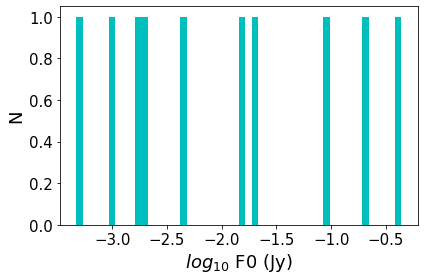

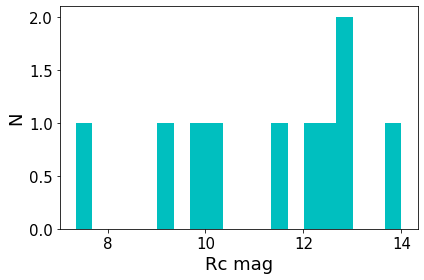

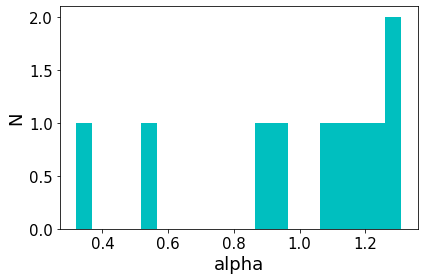

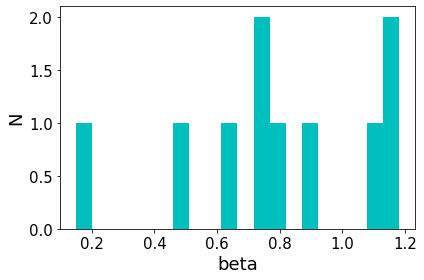

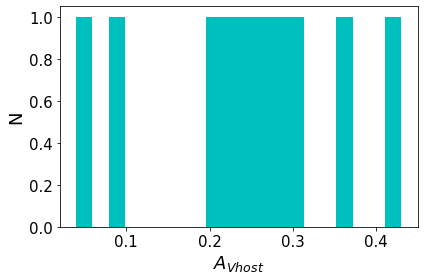

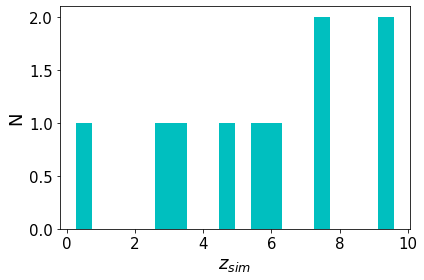

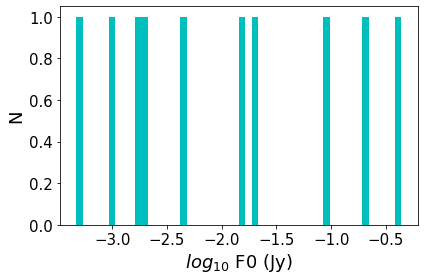

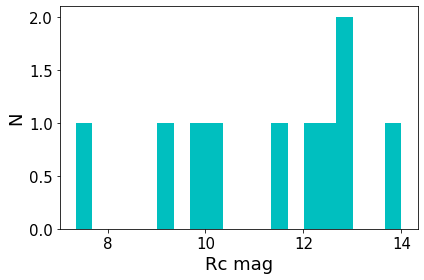

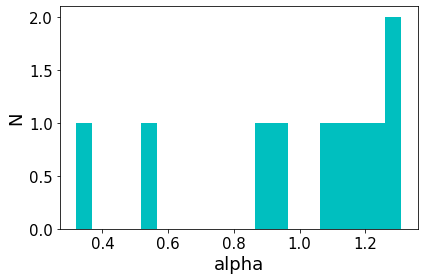

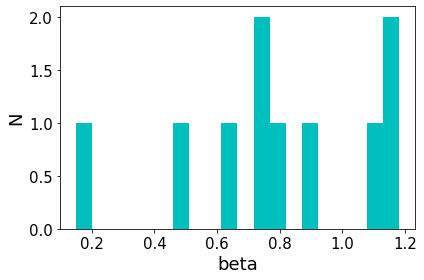

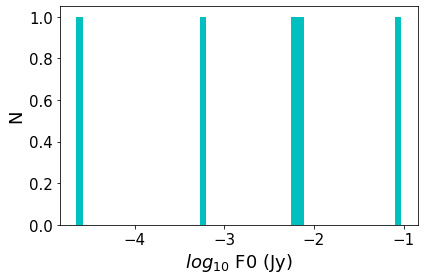

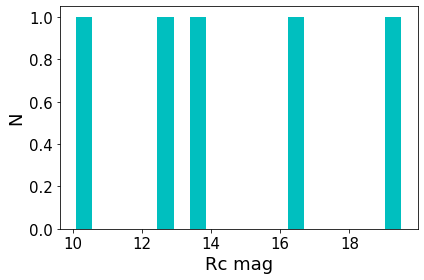

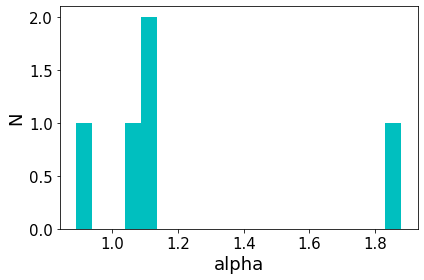

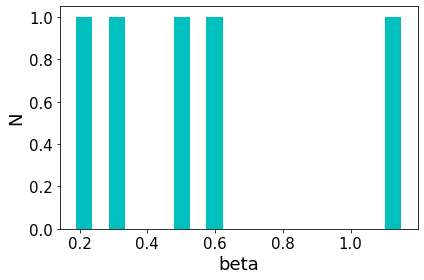

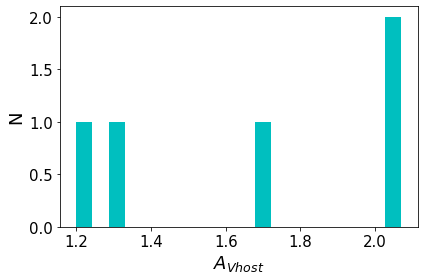

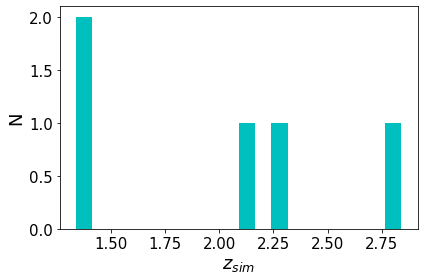

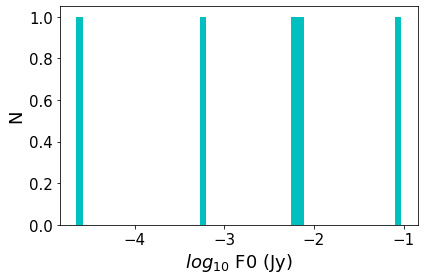

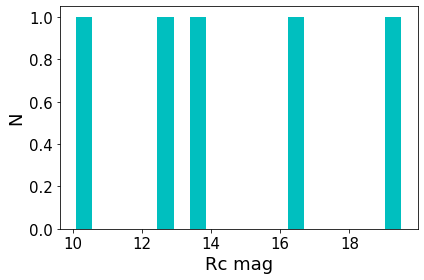

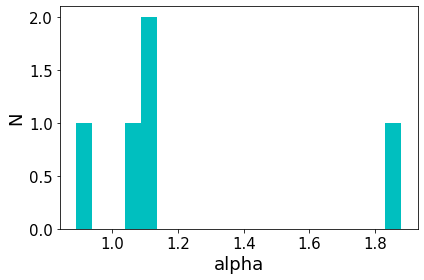

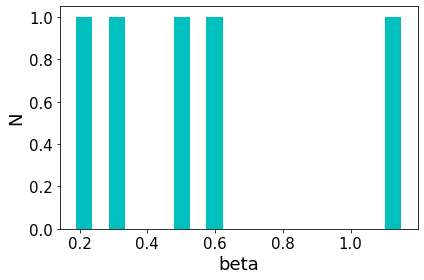

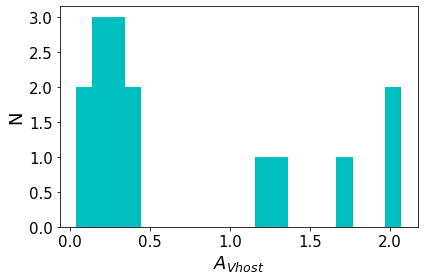

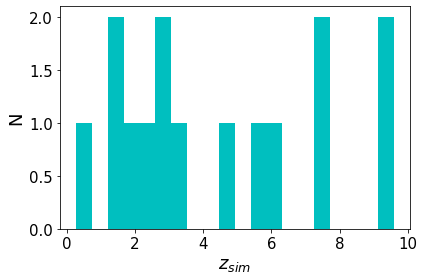

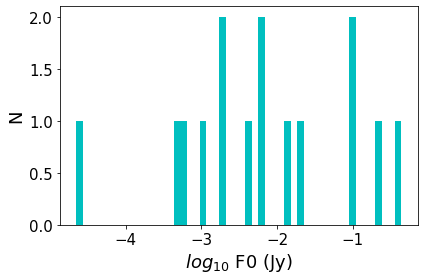

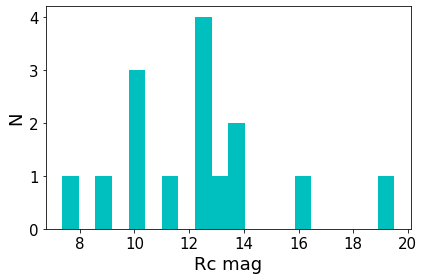

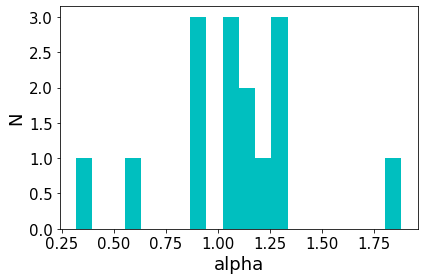

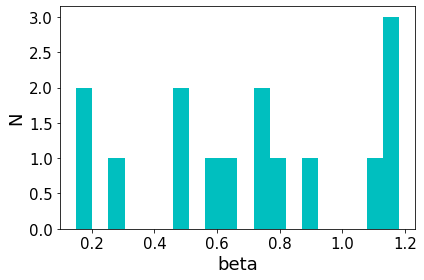

In [8]:
# Create the astropy table containing the parameters for the desired number of samples
# Load existing file if you want to compare different strategies efficiency

if mock_type == 'empirical':
        
    # Choose the GRB, redshift and host extinction parameters
    # This dictionary is expected in set_grb_params where the values will be updated if needed.
    # Av, alpha, beta, t0, wvl0 Parameters taken form Kann et al. 2010
    params=dict(
            z=['truncnorm',5.5,3.5,0,10],
            #z=['constant',4],
            #Av_host=['constant',0.5],
            Av_host=['truncnorm',0.1,0.3,0,2],
            #Av_host=['truncnorm',0.21,0.24,0,2],
            #Av_host=['truncnorm',0.1,0.5,0.,10],
            beta=['truncnorm',0.7,0.3,0,2],
            alpha=['truncnorm',1.2,0.38,0,2],
            wvl0=['constant',6400],
            t0=['constant',86.4],
            #ExtLaw=['smc'],
            ExtLaw=['smc','smc','smc','lmc','mw']
            )
        
    obs_strat.set_grb_params(params,
                             num_samples=nb_GRBs,
                             random_flag=True,
                             model='kann',
                             load_params=False,
                             params_file=path_pyGRBz+'/results/'+resdir+'/Obs_strategy/Params.tex',
                             load_min=1,
                             load_max=500,
                             load_distrib=True,
                             #distrib_file='Granot_Sari/Turpin_GS02_v2.txt',
                             distrib_file='Kann/Rc_86s_z=1.txt',
                             plot_distribution=display_plot,
                             seed=-1)
elif mock_type == 'theoretical':
    params=dict(
            z=['truncnorm',5.5,3.5,0,10],
            #Av_host=['constant',0.5],
            Av_host=['truncnorm',0.1,0.3,0,2],
            #Av_host=['truncnorm',0.21,0.24,0,2],
            #Av_host=['truncnorm',0.1,0.5,0.,10],
            ExtLaw=['smc','smc','smc','lmc','mw'],
            E_iso=['constant',56],
            eta=['constant',0.3],
            eps_b=['constant',1e-4],
            eps_e=['constant',0.1],
            p=['constant',2.3],
            Y=['constant',0],
            ism_type=['constant',0],
            n0=['constant',1],
            Mdot_loss=['constant',1e-5],
            Vw=['constant',1000],
            )
    
    obs_strat.set_grb_params(params,
                             num_samples=nb_GRBs,
                             random_flag=True,
                             model='gs02',
                             load_params=False,
                             params_file=path_pyGRBz+'/results/'+resdir+'/Obs_strategy/Params.tex',
                             load_min=1,
                             load_max=500,
                             load_distrib=True,
                             distrib_file='Granot_Sari/Turpin_GS02_v2.txt',
                             #distrib_file='Kann/Rc_86s_z=1.txt',
                             plot_distribution=display_plot,
                             seed=-1)
    
if add_dusty_GRBs:
    # Dusty GRBs are found up to z~4, with all type of dust
    params['z']=['truncnorm',2,1.,1,4]
    params['Av_host']=['truncnorm',1.3,1.1,1,3]
    params['ExtLaw']=['smc','lmc','mw']
    
    # Save parameter values of current mock sample
    shutil.copy(path_pyGRBz+'/results/'+resdir+'/Obs_strategy/Params.tex',
                path_pyGRBz+'/results/'+resdir+'/Obs_strategy/Params_normal.tex')
    backup_mock = ascii.read(path_pyGRBz+'/results/'+resdir+'/Obs_strategy/Params.tex')
    last_idx = int(backup_mock['name'][-1].split('_')[-1])
    # Compute parameters values for dusty sample
    if mock_type == 'empirical':
        obs_strat.set_grb_params(params,
                                 num_samples=nb_dusty_GRBs,
                                 random_flag=True,
                                 model='kann',
                                 load_params=False,
                                 load_distrib=True,
                                 distrib_file='Kann/Rc_86s_z=1.txt',
                                 plot_distribution=display_plot,
                                 seed=-1,
                                 name_prefix_start=last_idx+1
                                )
    elif mock_type == 'theoretical':
        obs_strat.set_grb_params(params,
                                 num_samples=nb_dusty_GRBs,
                                 random_flag=True,
                                 model='gs02',
                                 load_params=False,
                                 distrib_file='Granot_Sari/Turpin_GS02_v2.txt',
                                 plot_distribution=display_plot,
                                 seed=-1,
                                 name_prefix_start=last_idx+1
                                )
    shutil.copy(path_pyGRBz+'/results/'+resdir+'/Obs_strategy/Params.tex',
                path_pyGRBz+'/results/'+resdir+'/Obs_strategy/Params_dusty.tex')    
    # Concatenate mock normal + dusty samples
    dusty_mock = ascii.read(path_pyGRBz+'/results/'+resdir+'/Obs_strategy/Params_dusty.tex')
    total_mock = vstack([backup_mock,dusty_mock])
    total_mock.write(path_pyGRBz+'/results/'+resdir+'/Obs_strategy/Params_total.tex',format='latex',overwrite=True)
    total_mock.write(path_pyGRBz+'/results/'+resdir+'/Obs_strategy/Params_total.txt',format='ascii.commented_header',overwrite=True)
    
    # Load combined mock sample before computing light curves
    if mock_type == 'empirical':
        obs_strat.set_grb_params(params,
                                 load_min=1,load_max=len(total_mock),
                                 random_flag=True,
                                 model='kann',
                                 load_params=True,
                                 params_file=path_pyGRBz+'/results/'+resdir+'/Obs_strategy/Params_total.tex',
                                 load_distrib=False,
                                 plot_distribution=display_plot,
                                 seed=-1
                                )
    elif mock_type == 'theoretical':
        obs_strat.set_grb_params(params,
                                 load_min=1,load_max=len(total_mock),
                                 random_flag=True,
                                 model='gs02',
                                 load_params=True,
                                 params_file=path_pyGRBz+'/results/'+resdir+'/Obs_strategy/Params_total.tex',
                                 load_distrib=False,
                                 plot_distribution=display_plot,
                                 seed=-1
                                )

# Create Light Curves only with ETC

In [10]:
# Use the pyETC package to calculate the SNR and magnitude for each band at each time
# Time are expressed in seconds
RA_J2000, DEC_J2000 = 0, 0
obs_strat.set_lightcurves(SNR4detection=3,err_mag_sys=[0.04,0.06],
                          t_since_burst=60,t_start=0,t_end=300,t_dead=5,texp=[30,30],
                          configFile=configFile,telescope=name_telescope,
                          resdir='/data/lc/%s/' % resdir,
                          fname='',RA_J2000=RA_J2000,DEC_J2000=DEC_J2000,galactic_dust_corrected=True)

GRB Time Band
GRB_0 60 gri
GRB detected
GRB_0 60 zy
GRB_0 60 J
GRB_0 95 g
GRB_0 95 z
GRB_0 95 J
GRB_0 130 r
GRB_0 130 y
GRB_0 130 H
GRB_0 165 i
GRB_0 165 z
GRB_0 165 J
GRB_0 200 g
GRB_0 200 y
GRB_0 200 H
GRB_0 235 r
GRB_0 235 z
GRB_0 235 J
GRB_0 270 i
GRB_0 270 y
GRB_0 270 H
GRB_0 305 g
GRB_0 305 z
GRB_0 305 J
GRB_0 340 r
GRB_0 340 y
GRB_0 340 H
 Name Nb_obs time_since_burst Exp_time ...  mag   mag_err detection phot_sys
                    s            s     ...                                  
----- ------ ---------------- -------- ... ------ ------- --------- --------
GRB_0      1               60       30 ...  9.963   0.040         1       AB
GRB_0      1               60       30 ...  9.519   0.040         1       AB
GRB_0      1               60       30 ...  9.199   0.060         1       AB
GRB_0      1               95       30 ... 10.656   0.040         1       AB
GRB_0      1               95       30 ... 10.086   0.040         1       AB
GRB_0      1               95       

/home/corre/codes/mygithub/pyETC/pyETC/photometry.py:331: RuntimeWarning: divide by zero encountered in log10
  Mag=-2.5*np.log10(fluxJy/info_dict['Flux_zero_Jy'])


GRB_1 60 gri
GRB_1 60 zy
GRB_1 60 J
GRB detected


/home/corre/codes/mygithub/pyETC/pyETC/solver.py:186: RuntimeWarning: divide by zero encountered in log10
  mag = ZP - 2.5*np.log10(CR)
/home/corre/codes/mygithub/pyETC/pyETC/solver.py:187: RuntimeWarning: divide by zero encountered in log10
  mag_pix = ZP - 2.5*np.log10(CR_pix)


GRB_1 95 g
GRB_1 95 z
GRB_1 95 J
GRB_1 130 r
GRB_1 130 y
GRB_1 130 H
GRB_1 165 i
GRB_1 165 z
GRB_1 165 J
GRB_1 200 g
GRB_1 200 y
GRB_1 200 H
GRB_1 235 r
GRB_1 235 z
GRB_1 235 J
GRB_1 270 i
GRB_1 270 y
GRB_1 270 H
GRB_1 305 g
GRB_1 305 z
GRB_1 305 J
GRB_1 340 r
GRB_1 340 y
GRB_1 340 H
 Name Nb_obs time_since_burst Exp_time ...  mag   mag_err detection phot_sys
                    s            s     ...                                  
----- ------ ---------------- -------- ... ------ ------- --------- --------
GRB_1      1               60       30 ... 22.137   0.315         0       AB
GRB_1      1               60       30 ... 20.540   0.315         0       AB
GRB_1      1               60       30 ... 16.039   0.062         1       AB
GRB_1      1               95       30 ... 21.727   0.315         0       AB
GRB_1      1               95       30 ... 20.462   0.315         0       AB
GRB_1      1               95       30 ... 16.222   0.062         1       AB
GRB_1      2          

/home/corre/codes/mygithub/pyETC/pyETC/photometry.py:331: RuntimeWarning: divide by zero encountered in log10
  Mag=-2.5*np.log10(fluxJy/info_dict['Flux_zero_Jy'])


GRB_2 60 gri
GRB detected
GRB_2 60 zy
GRB_2 60 J
GRB_2 95 g
GRB_2 95 z
GRB_2 95 J
GRB_2 130 r
GRB_2 130 y
GRB_2 130 H
GRB_2 165 i
GRB_2 165 z
GRB_2 165 J
GRB_2 200 g
GRB_2 200 y
GRB_2 200 H
GRB_2 235 r
GRB_2 235 z
GRB_2 235 J
GRB_2 270 i
GRB_2 270 y
GRB_2 270 H
GRB_2 305 g
GRB_2 305 z
GRB_2 305 J
GRB_2 340 r
GRB_2 340 y
GRB_2 340 H
 Name Nb_obs time_since_burst Exp_time ...  mag   mag_err detection phot_sys
                    s            s     ...                                  
----- ------ ---------------- -------- ... ------ ------- --------- --------
GRB_2      1               60       30 ... 17.815   0.041         1       AB
GRB_2      1               60       30 ... 13.887   0.040         1       AB
GRB_2      1               60       30 ... 13.057   0.060         1       AB
GRB_2      1               95       30 ... 21.727   0.315         0       AB
GRB_2      1               95       30 ... 14.554   0.040         1       AB
GRB_2      1               95       30 ... 13.681 

/home/corre/codes/mygithub/pyETC/pyETC/photometry.py:331: RuntimeWarning: divide by zero encountered in log10
  Mag=-2.5*np.log10(fluxJy/info_dict['Flux_zero_Jy'])


GRB_3 60 gri
GRB_3 60 zy
GRB_3 60 J
GRB detected


/home/corre/codes/mygithub/pyETC/pyETC/solver.py:186: RuntimeWarning: divide by zero encountered in log10
  mag = ZP - 2.5*np.log10(CR)
/home/corre/codes/mygithub/pyETC/pyETC/solver.py:187: RuntimeWarning: divide by zero encountered in log10
  mag_pix = ZP - 2.5*np.log10(CR_pix)


GRB_3 95 g
GRB_3 95 z
GRB_3 95 J
GRB_3 130 r
GRB_3 130 y
GRB_3 130 H
GRB_3 165 i
GRB_3 165 z
GRB_3 165 J
GRB_3 200 g
GRB_3 200 y
GRB_3 200 H
GRB_3 235 r
GRB_3 235 z
GRB_3 235 J
GRB_3 270 i
GRB_3 270 y
GRB_3 270 H
GRB_3 305 g
GRB_3 305 z
GRB_3 305 J
GRB_3 340 r
GRB_3 340 y
GRB_3 340 H
 Name Nb_obs time_since_burst Exp_time ...  mag   mag_err detection phot_sys
                    s            s     ...                                  
----- ------ ---------------- -------- ... ------ ------- --------- --------
GRB_3      1               60       30 ... 22.137   0.315         0       AB
GRB_3      1               60       30 ... 20.540   0.315         0       AB
GRB_3      1               60       30 ... 17.078   0.068         1       AB
GRB_3      1               95       30 ... 21.727   0.315         0       AB
GRB_3      1               95       30 ... 20.462   0.315         0       AB
GRB_3      1               95       30 ... 17.637   0.078         1       AB
GRB_3      2          

/home/corre/codes/mygithub/pyETC/pyETC/photometry.py:331: RuntimeWarning: divide by zero encountered in log10
  Mag=-2.5*np.log10(fluxJy/info_dict['Flux_zero_Jy'])


GRB_4 60 gri
GRB_4 60 zy
GRB_4 60 J
GRB detected


/home/corre/codes/mygithub/pyETC/pyETC/solver.py:186: RuntimeWarning: divide by zero encountered in log10
  mag = ZP - 2.5*np.log10(CR)
/home/corre/codes/mygithub/pyETC/pyETC/solver.py:187: RuntimeWarning: divide by zero encountered in log10
  mag_pix = ZP - 2.5*np.log10(CR_pix)


GRB_4 95 g
GRB_4 95 z
GRB_4 95 J
GRB_4 130 r
GRB_4 130 y
GRB_4 130 H
GRB_4 165 i
GRB_4 165 z


KeyboardInterrupt: 


# Compute PhotoZ 

In [ ]:
from pyGRBz.pyGRBz import GRB_photoZ as photoZ

photZ = photoZ(output_dir='/results/%s/' % (resdir),plot=display_plot)

# Modify the indexes if you want to run on a subsample of the mock 
GRB_idx_start=0
if add_dusty_GRBs:
    GRB_idx_end = nb_GRBs + nb_dusty_GRBs
else:
    GRB_idx_end = nb_GRBs
GRB_list=['GRB_'+str(d) for d in range(GRB_idx_start,GRB_idx_end)]

photZ.load_data(data_dir='/data/lc/%s/' % resdir,
                data_name=GRB_list)

photZ.formatting()

photZ.extract_sed(model='SPL',method='ReddestBand',time_SED=1)

priors=dict(z=[0,11],Av=[0,3],beta=[0,2],norm=[0,10])
ext_laws = ['smc', 'lmc', 'mw', 'nodust']
#ext_laws = ['smc']
for ext_law in ext_laws:
    # If you want to run mcmc once and restart a second run 
    # centered on the values of the best chi2 set Nsteps1 !=0. nburn can be set to 50 here.
    # Otherwise set Nsteps1 to 0, and set Nsteps2 only and nburn to some values,
    # like Nsteps2=500 and nburn =200
    photZ.fit(ext_law=ext_law,sampler_type='ensemble',Nthreads=1,
              nwalkers=30,Nsteps1=300,Nsteps2=300,nburn=50,Host_dust=True,
              clean_data=True, igm_att='Meiksin',priors=priors)

# Keep the best chi2 among the different extinction laws

In [ ]:
from astropy.table import Table, vstack

output_dir=path_pyGRBz + '/results/%s/' % resdir

GRB_list=['GRB_'+str(d) for d in range(GRB_idx_start,GRB_idx_end)]
ext_laws = ['smc', 'mw', 'lmc','nodust']
#ext_laws = ['smc']


for ext in ext_laws:
    if ext == 'smc':
        fit_results_smc=ascii.read(output_dir+'best_fits_all_%s.dat' % ext)
    elif ext == 'mw':
        fit_results_mw=ascii.read(output_dir+'best_fits_all_%s.dat' % ext)
    elif ext == 'lmc':
        fit_results_lmc=ascii.read(output_dir+'best_fits_all_%s.dat' % ext)
    elif ext == 'nodust':
        fit_results_nodust=ascii.read(output_dir+'best_fits_all_%s.dat' % ext)
        
GRB_list = fit_results_smc['name']

if False: #len(fit_results_smc) != len(fit_results_mw):
    print ('Not same number of detected GRBs')
else:
    new_table=[]
    for GRB in GRB_list:
        if 'smc' in ext_laws:
            mask_smc = fit_results_smc['name'] == GRB
            sum_proba_smc = fit_results_smc['sum_proba'][mask_smc]
        else:
            mask_smc = []
            sum_proba_smc = []

        if 'mw' in ext_laws:
            mask_mw = fit_results_mw['name'] == GRB
            sum_proba_mw = fit_results_mw['sum_proba'][mask_mw]
        else:
            mask_mw = []
            sum_proba_mw = np.nan

        if 'lmc' in ext_laws:
            mask_lmc = fit_results_lmc['name'] == GRB
            sum_proba_lmc = fit_results_lmc['sum_proba'][mask_lmc]
        else:
            mask_lmc = []
            sum_proba_lmc =np.nan

        if 'nodust' in ext_laws:
            mask_nodust = fit_results_nodust['name'] == GRB
            sum_proba_nodust = fit_results_nodust['sum_proba'][mask_nodust]
        else:
            mask_nodust = []
            sum_proba_nodust =np.nan            
            
        if ('smc' in ext_laws) and (np.nanmax([sum_proba_smc, sum_proba_lmc,sum_proba_mw, sum_proba_nodust]) == sum_proba_smc) :
            #print (GRB,'smc')
            new_table.append(fit_results_smc[mask_smc])
        elif ('mw' in ext_laws) and  (np.nanmax([sum_proba_smc, sum_proba_lmc,sum_proba_mw, sum_proba_nodust]) == sum_proba_mw) :
            #print (GRB,'mw')
            new_table.append(fit_results_mw[mask_mw])
        elif ('lmc' in ext_laws) and  (np.nanmax([sum_proba_smc, sum_proba_lmc,sum_proba_mw, sum_proba_nodust]) == sum_proba_lmc) :
            #print (GRB,'lmc')
            new_table.append(fit_results_lmc[mask_lmc])
        elif ('nodust' in ext_laws) and  (np.nanmax([sum_proba_smc, sum_proba_lmc,sum_proba_mw, sum_proba_nodust]) == sum_proba_nodust) :
            #print (GRB,'lmc')
            new_table.append(fit_results_lmc[mask_lmc])            
new_table=vstack(new_table)
print (new_table)
new_table.write(output_dir+'best_fits_all_combined.dat',format='ascii')    

# Plot the photoz accuracy

In [ ]:
# Draw the 3 summary plots for the photoZ accuracy 
photZ.plot_zsim_zphot(input_file='best_fits_all_combined',output_suffix='_1sig',sigma=1,input_dir='/results/%s/' % resdir,output_dir='/results/%s/' % resdir)


# Create file summarising statistics 

In [ ]:
# load input
params_file=path_pyGRBz+'/results/%s/Obs_strategy/Params.tex' % resdir
data_in=ascii.read(params_file)

# Output file to store information
output_dir=path_pyGRBz+'/results/%s/' % resdir
f = open(output_dir+'results_summary.txt', 'w')

# Define redhsift ranges
zlim=[3.5,8]

# Total of GRBs in redshift ranges
mask1 = data_in['z'] < zlim[0]
mask2 = (data_in['z'] >= zlim[0]) & (data_in['z'] <= zlim[1])
mask3 = data_in['z'] > zlim[1]

nb_grb1=len(data_in[mask1])
nb_grb2=len(data_in[mask2])
nb_grb3=len(data_in[mask3])

f.write ('Nb GRBs at z < %.2f: %d\n' % (zlim[0],nb_grb1))
f.write ('Nb GRBs at %.2f < z < %.2f: %d\n' % (zlim[0], zlim[1], nb_grb2))
f.write ('Nb GRBs at z > %.2f: %d\n' % (zlim[1], nb_grb3))
f.write ('Nb GRBs total %d\n' % (nb_grb1+nb_grb2+nb_grb3))
f.write ('\n')

###########################################################################
# Number of dusty GRBs detected
nb_det=1 # Number of band in which there is a detection
Avlim = 1
data=ascii.read(output_dir+'best_fits_all_combined.dat')
mask1 = (data_in['Av_host'] >= Avlim)
mask2 = (data['Av_host_sim'] >= Avlim) & (data['nb_detection'] >= nb_det)

nb_grb_dusty=len(data_in[mask1])
nb_grb_dusty_det=len(data[mask2])

f.write ('Nb dusty GRBs detected: %d / %d\n' % (nb_grb_dusty_det,nb_grb_dusty))
f.write ('\n')
###########################################################################

data=ascii.read(output_dir+'best_fits_all_combined.dat')
level=68
nb_det=2

mask0 = (data['nb_detection'] > nb_det)
mask1 = (data['z_sim']<zlim[0]) & (data['nb_detection'] > nb_det)
mask2 = (data['z_sim'] >=zlim[0]) & (data['z_sim'] <= zlim[1]) & (data['nb_detection'] > nb_det)
mask3 = (data['z_sim'] > zlim[1]) & (data['nb_detection'] > nb_det)

f.write ('Total number of GRBs detected in at least %d bands: \n'  % nb_det)
if mask1.any() and nb_grb1 > 0:
    f.write ('at z < %.2f: %d/%d (%.2f%%) \n' % (zlim[0],len(data[mask1]),nb_grb1, 100*len(data[mask1])/nb_grb1))
else:
    f.write ('at z < %.2f: %d/%d (%.2f%%) \n' % (zlim[0],0,nb_grb1, 0))
if mask2.any() and nb_grb2 > 0: 
    f.write ('at %.2f < z < %.2f: %d/%d (%.2f%%) \n' % (zlim[0],zlim[1],len(data[mask2]),nb_grb2, 100*len(data[mask2])/nb_grb2))
else:
    f.write ('at %.2f < z < %.2f: %d/%d (%.2f%%) \n' % (zlim[0],zlim[1],0,nb_grb2,0))
if mask3.any() and nb_grb3 > 0:
    f.write ('at z > %.2f: %d/%d (%.2f%%) \n' % (zlim[1],len(data[mask3]),nb_grb3, 100*len(data[mask3])/nb_grb3))
else:
    f.write ('at z > %.2f: %d/%d (%.2f%%) \n' % (zlim[1],0,nb_grb3, 0))
total_det = len(data[mask0])
f.write ('All z: %d/%d (%.2f%%)\n' % (total_det,nb_grb1+nb_grb2+nb_grb3,100*(total_det/(nb_grb1+nb_grb2+nb_grb3))))
f.write ('\n')

f.write ('Mean and standard deviations statistics (detection in at least %d bands):\n' % nb_det)
if mask1.any():
    abs_err = np.mean(data[mask1]['zphot_%s' % level] - data[mask1]['z_sim'])
    abs_err_std = np.std(data[mask1]['zphot_%s' % level] - data[mask1]['z_sim'])
    relative_err = np.mean((data[mask1]['zphot_%s' % level] -data[mask1]['z_sim'])/ (1+data[mask1]['z_sim']))
    relative_err_std = np.std((data[mask1]['zphot_%s' % level] -data[mask1]['z_sim'])/ (1+data[mask1]['z_sim']))
    f.write ('At z < %.2f: \n' % zlim[0])
    f.write ('zphot-zsim mean: %.3f\n' % (abs_err))
    f.write ('zphot-zsim std: %.3f\n' % (abs_err_std))
    f.write ('(zphot-zsim)/(1+zsim) mean: %.3f\n' % (relative_err))
    f.write ('(zphot-zsim)/(1+zsim) std: %.3f\n' % (relative_err_std))
    f.write ('\n')
if mask2.any():
    abs_err = np.mean(data[mask2]['zphot_%s' % level] - data[mask2]['z_sim'])
    abs_err_std = np.std(data[mask2]['zphot_%s' % level] - data[mask2]['z_sim'])
    relative_err = np.mean((data[mask2]['zphot_%s' % level] -data[mask2]['z_sim'])/ (1+data[mask2]['z_sim']))
    relative_err_std = np.std((data[mask2]['zphot_%s' % level] -data[mask2]['z_sim'])/ (1+data[mask2]['z_sim']))
    f.write ('At %.2f < z < %.2f: \n' % (zlim[0],zlim[1]))
    f.write ('zphot-zsim mean: %.3f\n' % (abs_err))
    f.write ('zphot-zsim std: %.3f\n' % (abs_err_std))
    f.write ('(zphot-zsim)/(1+zsim) mean: %.3f\n' % (relative_err))
    f.write ('(zphot-zsim)/(1+zsim) std: %.3f\n' % (relative_err_std))
    f.write ('\n')
if mask3.any():
    abs_err = np.mean(data[mask3]['zphot_%s' % level] - data[mask3]['z_sim'])
    abs_err_std = np.std(data[mask3]['zphot_%s' % level] - data[mask3]['z_sim'])
    relative_err = np.mean((data[mask3]['zphot_%s' % level] -data[mask3]['z_sim'])/ (1+data[mask3]['z_sim']))
    relative_err_std = np.std((data[mask3]['zphot_%s' % level] -data[mask3]['z_sim'])/ (1+data[mask3]['z_sim']))
    f.write ('At z > %.2f: \n' % zlim[1])
    f.write ('zphot-zsim mean: %.3f\n' % (abs_err))
    f.write ('zphot-zsim std: %.3f\n' % (abs_err_std))
    f.write ('(zphot-zsim)/(1+zsim) mean: %.3f\n' % (relative_err))
    f.write ('(zphot-zsim)/(1+zsim) std: %.3f\n' % (relative_err_std))
    f.write ('\n')
f.close()